In [1]:
import pandas as pd
import numpy as np
# pd.set_option('display.float_format', lambda x: '%.7f' % x)
# set the options to see all columns, rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_info_columns', 1001)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('ytick',labelsize=15)
# To use 한글 font in graphs
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
# 그래프에서 음수값이 나올 때, 깨지는 현상 방지
plt.rc('axes', unicode_minus = False)
import itertools
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# data_raw = pd.read_csv('./datas/train/dataset_0225_2041.csv')
data_raw = pd.read_csv('./dataset_0226_14_42.csv')

In [4]:
data = data_raw.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302780 entries, 0 to 302779
Data columns (total 40 columns):
가입자일련번호         302780 non-null int64
성별코드            302780 non-null int64
연령대코드(5세단위)     302780 non-null int64
시도코드            302780 non-null int64
신장(5Cm단위)       302780 non-null float64
체중(5Kg단위)       302780 non-null float64
허리둘레            302780 non-null float64
시력(좌)           302780 non-null float64
시력(우)           302780 non-null float64
청력(좌)           302780 non-null float64
청력(우)           302780 non-null float64
수축기혈압           302780 non-null float64
이완기혈압           302780 non-null float64
식전혈당(공복혈당)      302780 non-null float64
총콜레스테롤          302780 non-null float64
트리글리세라이드        302780 non-null float64
HDL콜레스테롤        302780 non-null float64
LDL콜레스테롤        302780 non-null float64
혈색소             302780 non-null float64
요단백             302780 non-null float64
혈청크레아티닌         302780 non-null float64
(혈청지오티)AST      302780 non-null float64
(혈청지오티)ALT      3

In [6]:
data_diab = data[['가입자일련번호','성별코드', '연령대코드(5세단위)', '허리둘레', '수축기혈압',
                  '이완기혈압','당뇨병 의사 판정','합병증_종류','BMI','구강검진 수검여부']]

In [7]:
data_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302780 entries, 0 to 302779
Data columns (total 10 columns):
가입자일련번호        302780 non-null int64
성별코드           302780 non-null int64
연령대코드(5세단위)    302780 non-null int64
허리둘레           302780 non-null float64
수축기혈압          302780 non-null float64
이완기혈압          302780 non-null float64
당뇨병 의사 판정      302780 non-null float64
합병증_종류         302780 non-null int64
BMI            302780 non-null float64
구강검진 수검여부      302780 non-null int64
dtypes: float64(5), int64(5)
memory usage: 23.1 MB


In [8]:
x_data = data_diab.drop(['합병증_종류',], axis = 1)
y_data = data_diab['합병증_종류']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                    test_size = 0.3, random_state=42)

In [10]:
x_test_id = x_test.reset_index(drop=True)
x_train = x_train.drop('가입자일련번호', axis = 1)
x_test = x_test.drop('가입자일련번호', axis = 1)

In [11]:
f1_list = []
accuracy_list = []

# 1-1. Random Forest

In [12]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
y_pred = rf.predict(x_test)
print(accuracy_score(y_test, y_pred))
accuracy_list.append(accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix, classification_report
print(f1_score(y_test, y_pred, average='weighted'))
f1_list.append(f1_score(y_test, y_pred, average='weighted'))
cnf = confusion_matrix(y_test, y_pred,)

0.8746504612810181
0.858583029821812


In [14]:
df_predict = pd.DataFrame(y_pred,columns=['합병증_유무',])
df_predict['환자번호'] =  x_test_id['가입자일련번호']
df_predict['질병_유무'] = x_test_id['당뇨병 의사 판정']
#column 순서 바꾸기
df_predict = df_predict.reindex_axis(['환자번호','합병증_유무','질병_유무'], axis=1)


In [15]:
df_predict[(df_predict['질병_유무']==1)&(df_predict['합병증_유무']!=0)]

,환자번호,합병증_유무,질병_유무
73,614602,1,1.0
74,951446,1,1.0
80,201194,1,1.0
83,812754,3,1.0
91,483670,3,1.0
96,200709,1,1.0
110,991172,1,1.0
144,892653,1,1.0
160,779385,4,1.0
214,450026,3,1.0


### 1-2. LGBM(당뇨)

In [16]:
lgb_diab = LGBMClassifier(n_jobs=-1,)
lgb_diab.fit(x_train, y_train)
y_pred_diab_lgbm = lgb_diab.predict(x_test)
accuracy_list.append(accuracy_score(y_test, y_pred_diab_lgbm))
f1_list.append(f1_score(y_test, y_pred_diab_lgbm, average='weighted'))

In [17]:
print(classification_report(y_pred_diab_lgbm, y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     87036
           1       0.13      0.51      0.20      1584
           2       0.12      0.50      0.19       821
           3       0.64      0.59      0.62       858
           4       0.42      0.47      0.44       535

   micro avg       0.89      0.89      0.89     90834
   macro avg       0.46      0.59      0.48     90834
weighted avg       0.96      0.89      0.92     90834



In [18]:
df_predict = pd.DataFrame(y_pred,columns=['합병증_유무',])
df_predict['환자번호'] =  x_test_id['가입자일련번호']
df_predict['질병_유무'] = x_test_id['당뇨병 의사 판정']
#column 순서 바꾸기
df_predict = df_predict.reindex_axis(['환자번호','합병증_유무','질병_유무'], axis=1)

df_predict[(df_predict['질병_유무']==1)&(df_predict['합병증_유무']!=0)]

,환자번호,합병증_유무,질병_유무
73,614602,1,1.0
74,951446,1,1.0
80,201194,1,1.0
83,812754,3,1.0
91,483670,3,1.0
96,200709,1,1.0
110,991172,1,1.0
144,892653,1,1.0
160,779385,4,1.0
214,450026,3,1.0


In [19]:
df_predict_lgb = pd.DataFrame(y_pred_diab_lgbm,columns=['합병증_유무',])
df_predict_lgb['환자번호'] =  x_test_id['가입자일련번호']
df_predict_lgb['질병_유무'] = x_test_id['당뇨병 의사 판정']
df_predict_lgb = df_predict_lgb.reindex_axis(['환자번호','합병증_유무','질병_유무'], axis=1)

diab_lgb_predict = df_predict_lgb[(df_predict_lgb['질병_유무']==1)&(df_predict_lgb['합병증_유무']!=0)]

### 1-3. XGBoost(당뇨)

In [20]:
xgb_diab = XGBClassifier(n_jobs=-1,)
xgb_diab.fit(x_train, y_train)
y_pred_diab_xgb = xgb_diab.predict(x_test)
accuracy_list.append(accuracy_score(y_test, y_pred_diab_xgb))
f1_list.append(f1_score(y_test, y_pred_diab_xgb, average='weighted'))

df_predict_xgb = pd.DataFrame(y_pred_diab_xgb,columns=['합병증_유무',])
df_predict_xgb['환자번호'] =  x_test_id['가입자일련번호']
df_predict_xgb['질병_유무'] = x_test_id['당뇨병 의사 판정']
df_predict_xgb = df_predict_xgb.reindex_axis(['환자번호','합병증_유무','질병_유무'], axis=1)
diab_xgb_predict = df_predict_xgb[(df_predict_xgb['질병_유무']==1)&(df_predict_xgb['합병증_유무']!=0)]

# 2. 고혈압만 환자들로 모델링

### 2-1. Random Forest

In [21]:
data_hbp = data.copy()

data_hbp=data[['가입자일련번호','성별코드',
              '연령대코드(5세단위)', '허리둘레', '수축기혈압',
              '이완기혈압','고혈압 의사 판정','합병증_종류','BMI','구강검진 수검여부']]

data_hbp['고혈압 의사 판정'].value_counts()

x_data_hbp = data_hbp.drop(['합병증_종류',], axis = 1)
y_data_hbp = data_hbp['합병증_종류']

x_train_hbp, x_test_hbp, y_train_hbp, y_test_hbp = train_test_split(x_data_hbp, y_data_hbp, 
                                                    test_size = 0.3, random_state=42)

x_test_id_hbp = x_test_hbp.reset_index(drop=True)
x_train_hbp = x_train_hbp.drop('가입자일련번호', axis = 1)
x_test_hbp = x_test_hbp.drop('가입자일련번호', axis = 1)

rf_hbp = RandomForestClassifier(n_jobs=-1)
rf_hbp.fit(x_train_hbp, y_train_hbp)

y_pred_hbp = rf_hbp.predict(x_test_hbp)
print(accuracy_score(y_test_hbp, y_pred_hbp))
accuracy_list.append(accuracy_score(y_test_hbp, y_pred_hbp))
f1_list.append(f1_score(y_test_hbp, y_pred_hbp, average='weighted'))

0.8637294405178677


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print(f1_score(y_test_hbp, y_pred_hbp, average='weighted'))
cnf_hbp = confusion_matrix(y_test_hbp, y_pred_hbp,)


0.8273252993223479


In [23]:
rf_proba_hbp = pd.DataFrame(y_pred_hbp,columns=['합병증_유무',])
rf_proba_hbp['환자번호'] =  x_test_id_hbp['가입자일련번호']
rf_proba_hbp['질병_유무'] = x_test_id_hbp['고혈압 의사 판정']
rf_proba_hbp = rf_proba_hbp.reindex_axis(['환자번호','합병증_유무','질병_유무',], axis=1)
hbp_pred_rf = rf_proba_hbp[(rf_proba_hbp['질병_유무']==1)&(rf_proba_hbp['합병증_유무']!=0)]

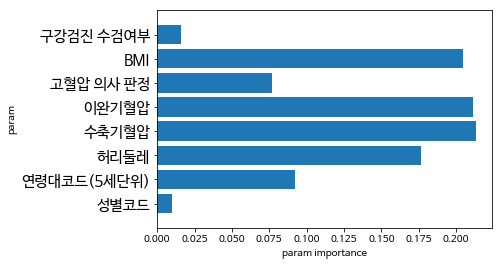

In [108]:
def plot_feature_importances_cancer(model):
    n_features = x_train_hbp.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train_hbp.columns)
    plt.xlabel("param importance")
    plt.ylabel("param")
    plt.ylim(-1, n_features)
plt.show()

plot_feature_importances_cancer(rf_hbp)

### 2-2. LGBM

In [24]:
data_hbp_lgbm = data.copy()

data_hbp_lgbm=data[['가입자일련번호','성별코드',
              '연령대코드(5세단위)', '허리둘레', '수축기혈압',
              '이완기혈압','고혈압 의사 판정','합병증_종류','BMI','구강검진 수검여부']]
data_hbp_lgbm['고혈압 의사 판정'].value_counts()


x_data_hbp_lgbm = data_hbp_lgbm.drop(['합병증_종류',], axis = 1)
y_data_hbp_lgbm = data_hbp_lgbm['합병증_종류']

x_train_hbp_lgbm, x_test_hbp_lgbm, y_train_hbp_lgbm, y_test_hbp_lgbm = train_test_split(x_data_hbp_lgbm, y_data_hbp_lgbm, 
                                                    test_size = 0.3, random_state=42)

x_test_id_hbp_lgbm = x_test_hbp_lgbm.reset_index(drop=True)
x_train_hbp_lgbm = x_train_hbp_lgbm.drop('가입자일련번호', axis = 1)
x_test_hbp_lgbm = x_test_hbp_lgbm.drop('가입자일련번호', axis = 1)

rf_hbp_lgbm = LGBMClassifier(n_jobs=-1)
rf_hbp_lgbm.fit(x_train_hbp_lgbm, y_train_hbp_lgbm)

y_pred_hbp_lgbm = rf_hbp_lgbm.predict(x_test_hbp_lgbm)
print(accuracy_score(y_test_hbp_lgbm, y_pred_hbp_lgbm))

accuracy_list.append(accuracy_score(y_test_hbp_lgbm, y_pred_hbp_lgbm))
f1_list.append(f1_score(y_test_hbp_lgbm, y_pred_hbp_lgbm, average='weighted'))
print(f1_score(y_test_hbp_lgbm, y_pred_hbp_lgbm, average='weighted'))

0.8763788889622829
0.8261177459928966


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
cnf_hbp_lgbm = confusion_matrix(y_test_hbp_lgbm, y_pred_hbp_lgbm,)

rf_proba_hbp_lgbm = pd.DataFrame(y_pred_hbp_lgbm,columns=['합병증_유무',])
rf_proba_hbp_lgbm['환자번호'] =  x_test_id_hbp_lgbm['가입자일련번호']
rf_proba_hbp_lgbm['질병_유무'] = x_test_id_hbp_lgbm['고혈압 의사 판정']

rf_proba_hbp_lgbm = rf_proba_hbp_lgbm.reindex_axis(['환자번호','합병증_유무','질병_유무',], axis=1)

rf_proba_hbp_lgbm_=rf_proba_hbp_lgbm[(rf_proba_hbp_lgbm['질병_유무']==1)&(rf_proba_hbp_lgbm['합병증_유무']!=0)]

### 3. XGboost

In [26]:
data_hbp_xgb = data.copy()

data_hbp_xgb=data[['가입자일련번호','성별코드',
              '연령대코드(5세단위)', '허리둘레', '수축기혈압',
              '이완기혈압','고혈압 의사 판정','합병증_종류','BMI','구강검진 수검여부']]

data_hbp_xgb['고혈압 의사 판정'].value_counts()


x_data_hbp_xgb = data_hbp_xgb.drop(['합병증_종류',], axis = 1)
y_data_hbp_xgb = data_hbp_xgb['합병증_종류']

x_train_hbp_xgb, x_test_hbp_xgb, y_train_hbp_xgb, y_test_hbp_xgb = train_test_split(x_data_hbp_xgb, y_data_hbp_xgb, 
                                                    test_size = 0.3, random_state=42)

x_test_id_hbp_xgb = x_test_hbp_xgb.reset_index(drop=True)
x_train_hbp_xgb = x_train_hbp_xgb.drop('가입자일련번호', axis = 1)
x_test_hbp_xgb = x_test_hbp_xgb.drop('가입자일련번호', axis = 1)

rf_hbp_xgb = XGBClassifier(n_jobs=-1, objective='multi:softprob')
rf_hbp_xgb.fit(x_train_hbp_xgb, y_train_hbp_xgb)

y_pred_hbp_xgb = rf_hbp_xgb.predict(x_test_hbp_xgb)
print(accuracy_score(y_test_hbp_xgb, y_pred_hbp_xgb))

print(f1_score(y_test_hbp_xgb, y_pred_hbp_xgb, average='weighted'))
cnf_hbp_xgb = confusion_matrix(y_test_hbp_xgb, y_pred_hbp_xgb,)

#score 시각화 위해append
accuracy_list.append(accuracy_score(y_test_hbp_xgb, y_pred_hbp_xgb))
f1_list.append(f1_score(y_test_hbp_xgb, y_pred_hbp_xgb, average='weighted'))


0.8765990708325077
0.8250068220440923


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [27]:
rf_proba_hbp_xgb = pd.DataFrame(y_pred_hbp_xgb,columns=['합병증_유무',])
rf_proba_hbp_xgb['환자번호'] =  x_test_id_hbp_xgb['가입자일련번호']
rf_proba_hbp_xgb['질병_유무'] = x_test_id_hbp_xgb['고혈압 의사 판정']

rf_proba_hbp_xgb = rf_proba_hbp_xgb.reindex_axis(['환자번호','합병증_유무','질병_유무',], axis=1)

rf_proba_hbp_xgb_=rf_proba_hbp_xgb[(rf_proba_hbp_xgb['질병_유무']==1)&(rf_proba_hbp_xgb['합병증_유무']!=0)]

# 3. 이상지혈증 환자 모델

### 3- 1 RandomForest

In [28]:
data_ab_rf = data.copy()

data_ab_rf=data[['가입자일련번호','성별코드',
              '연령대코드(5세단위)', '허리둘레', '수축기혈압',
              '이완기혈압','지질혈증 의사 판정','합병증_종류','BMI','구강검진 수검여부']]

data_ab_rf['지질혈증 의사 판정'].value_counts()


x_data_ab_rf = data_ab_rf.drop(['합병증_종류',], axis = 1)
y_data_ab_rf = data_ab_rf['합병증_종류']

x_train_ab_rf, x_test_ab_rf, y_train_ab_rf, y_test_ab_rf = train_test_split(x_data_ab_rf, y_data_ab_rf, 
                                                    test_size = 0.3, random_state=42)

x_test_id_ab_rf = x_test_ab_rf.reset_index(drop=True)
x_train_ab_rf = x_train_ab_rf.drop('가입자일련번호', axis = 1)
x_test_ab_rf = x_test_ab_rf.drop('가입자일련번호', axis = 1)

rf_ab_rf = RandomForestClassifier(n_jobs=-1)
rf_ab_rf.fit(x_train_ab_rf, y_train_ab_rf)

y_pred_ab_rf = rf_ab_rf.predict(x_test_ab_rf)
print(accuracy_score(y_test_ab_rf, y_pred_ab_rf))

#score 시각화 위해append
accuracy_list.append(accuracy_score(y_test_ab_rf, y_pred_ab_rf))
f1_list.append(f1_score(y_test_ab_rf, y_pred_ab_rf, average='weighted'))

0.9038685954598499


In [29]:
print(f1_score(y_test_ab_rf, y_pred_ab_rf, average='weighted'))
cnf_ab_rf = confusion_matrix(y_test_ab_rf, y_pred_ab_rf,)

df_predict_ab_rf = pd.DataFrame(y_pred_ab_rf,columns=['합병증_유무',])
df_predict_ab_rf['환자번호'] =  x_test_id_ab_rf['가입자일련번호']
df_predict_ab_rf['질병_유무'] = x_test_id_ab_rf['지질혈증 의사 판정']
#column 순서 바꾸기
df_predict_ab_rf = df_predict_ab_rf.reindex_axis(['환자번호','합병증_유무','질병_유무'],
                                                 axis=1)

df_predict_ab_rf[(df_predict['질병_유무']==1)&(df_predict_ab_rf['합병증_유무']!=0)]

0.8712112462413083


,환자번호,합병증_유무,질병_유무
91,483670,2,1
160,779385,2,1
574,670501,1,1
631,578466,2,1
874,510921,2,1
1111,500516,2,1
1382,258863,2,1
1398,155907,2,1
1407,252769,2,1
1485,520939,2,1


### 3-2. LGBM

In [30]:
data_ab_lgbm = data.copy()

data_ab_lgbm=data[['가입자일련번호','성별코드',
              '연령대코드(5세단위)', '허리둘레', '수축기혈압',
              '이완기혈압','지질혈증 의사 판정','합병증_종류','BMI','구강검진 수검여부']]

data_ab_lgbm['지질혈증 의사 판정'].value_counts()


x_data_ab_lgbm = data_ab_lgbm.drop(['합병증_종류',], axis = 1)
y_data_ab_lgbm = data_ab_lgbm['합병증_종류']

x_train_ab_lgbm, x_test_ab_lgbm, y_train_ab_lgbm, y_test_ab_lgbm = train_test_split(x_data_ab_lgbm, y_data_ab_lgbm, 
                                                    test_size = 0.3, random_state=42)

x_test_id_ab_lgbm = x_test_ab_lgbm.reset_index(drop=True)
x_train_ab_lgbm = x_train_ab_lgbm.drop('가입자일련번호', axis = 1)
x_test_ab_lgbm = x_test_ab_lgbm.drop('가입자일련번호', axis = 1)

rf_ab_lgbm = LGBMClassifier(n_jobs=-1)
rf_ab_lgbm.fit(x_train_ab_lgbm, y_train_ab_lgbm)

y_pred_ab_lgbm = rf_ab_lgbm.predict(x_test_ab_lgbm)
print(accuracy_score(y_test_ab_lgbm, y_pred_ab_lgbm))

#score 시각화 위해append
accuracy_list.append(accuracy_score(y_test_ab_lgbm, y_pred_ab_lgbm))
f1_list.append(f1_score(y_test_ab_lgbm, y_pred_ab_lgbm, average='weighted'))

from sklearn.metrics import confusion_matrix, classification_report
print(f1_score(y_test_ab_lgbm, y_pred_ab_lgbm, average='micro'))
cnf_ab_lgbm = confusion_matrix(y_test_ab_lgbm, y_pred_ab_lgbm,)


0.9132043067573816
0.9132043067573816


In [31]:
df_predict_ab_lgbm = pd.DataFrame(y_pred_ab_lgbm,columns=['합병증_유무',])
df_predict_ab_lgbm['환자번호'] =  x_test_id_ab_lgbm['가입자일련번호']
df_predict_ab_lgbm['질병_유무'] = x_test_id_ab_lgbm['지질혈증 의사 판정']
#column 순서 바꾸기
df_predict_ab_lgbm = df_predict_ab_lgbm.reindex_axis(['환자번호','합병증_유무','질병_유무'],
                                                 axis=1)

abc = df_predict_ab_lgbm[(df_predict['질병_유무']==1)&(df_predict_ab_lgbm['합병증_유무']!=0)]

In [32]:
abc.head(100)

,환자번호,합병증_유무,질병_유무
91,483670,2,1
160,779385,2,1
631,578466,2,1
874,510921,2,1
1111,500516,2,1
1382,258863,2,1
1398,155907,2,1
1407,252769,2,1
1485,520939,2,1
1488,561649,2,1


### 3-3. Xgboost

In [33]:
data_ab_xgb = data.copy()

data_ab_xgb=data[['가입자일련번호','성별코드',
              '연령대코드(5세단위)', '허리둘레', '수축기혈압',
              '이완기혈압','지질혈증 의사 판정','합병증_종류','BMI','구강검진 수검여부']]

data_ab_xgb['지질혈증 의사 판정'].value_counts()


x_data_ab_xgb = data_ab_xgb.drop(['합병증_종류',], axis = 1)
y_data_ab_xgb = data_ab_xgb['합병증_종류']

x_train_ab_xgb, x_test_ab_xgb, y_train_ab_xgb, y_test_ab_xgb = train_test_split(x_data_ab_xgb, y_data_ab_xgb, 
                                                    test_size = 0.3, random_state=42)

x_test_id_ab_xgb = x_test_ab_xgb.reset_index(drop=True)
x_train_ab_xgb = x_train_ab_xgb.drop('가입자일련번호', axis = 1)
x_test_ab_xgb = x_test_ab_xgb.drop('가입자일련번호', axis = 1)

rf_ab_xgb = XGBClassifier(n_jobs=-1, objective='multi:softprob')
rf_ab_xgb.fit(x_train_ab_xgb, y_train_ab_xgb)

y_pred_ab_xgb = rf_ab_xgb.predict(x_test_ab_xgb)
print(accuracy_score(y_test_ab_xgb, y_pred_ab_xgb))

#score 시각화 위해append
accuracy_list.append(accuracy_score(y_test_ab_xgb, y_pred_ab_xgb))
f1_list.append(f1_score(y_test_ab_xgb, y_pred_ab_xgb, average='weighted'))

from sklearn.metrics import confusion_matrix, classification_report
print(f1_score(y_test_ab_xgb, y_pred_ab_xgb, average='weighted'))
cnf_ab_xgb = confusion_matrix(y_test_ab_xgb, y_pred_ab_xgb,)


0.9137107250588986
0.8725672127470528


/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
df_predict_ab_xgb = pd.DataFrame(y_pred_ab_xgb,columns=['합병증_유무',])
df_predict_ab_xgb['환자번호'] =  x_test_id_ab_xgb['가입자일련번호']
df_predict_ab_xgb['질병_유무'] = x_test_id_ab_xgb['지질혈증 의사 판정']
#column 순서 바꾸기
df_predict_ab_xgb = df_predict_ab_xgb.reindex_axis(['환자번호','합병증_유무','질병_유무'],
                                                 axis=1)

df_predict_ab_xgb[(df_predict['질병_유무']==1)&(df_predict_ab_xgb['합병증_유무']!=0)]

,환자번호,합병증_유무,질병_유무
91,483670,2,1
160,779385,2,1
631,578466,2,1
874,510921,2,1
1111,500516,2,1
1382,258863,2,1
1398,155907,2,1
1407,252769,2,1
1485,520939,2,1
1488,561649,2,1


In [35]:
score_df = pd.DataFrame()
score_df['질병'] = ['당뇨','당뇨','당뇨', '고혈압','고혈압','고혈압', '이상지질혈증', '이상지질혈증', '이상지질혈증',]
score_df['MODEL'] = ['RF', 'LGB', 'XGB','RF', 'LGB', 'XGB','RF', 'LGB', 'XGB']
score_df['Accuracy'] = accuracy_list
score_df['F1_score'] = f1_list

In [36]:
score_df.round(3)

,질병,MODEL,Accuracy,F1_score
0,당뇨,RF,0.875,0.859
1,당뇨,LGB,0.885,0.855
2,당뇨,XGB,0.886,0.840
3,고혈압,RF,0.864,0.827
4,고혈압,LGB,0.876,0.826
5,고혈압,XGB,0.877,0.825
6,이상지질혈증,RF,0.904,0.871
7,이상지질혈증,LGB,0.913,0.873
8,이상지질혈증,XGB,0.914,0.873


Text(0.5, 0, 'Disease')

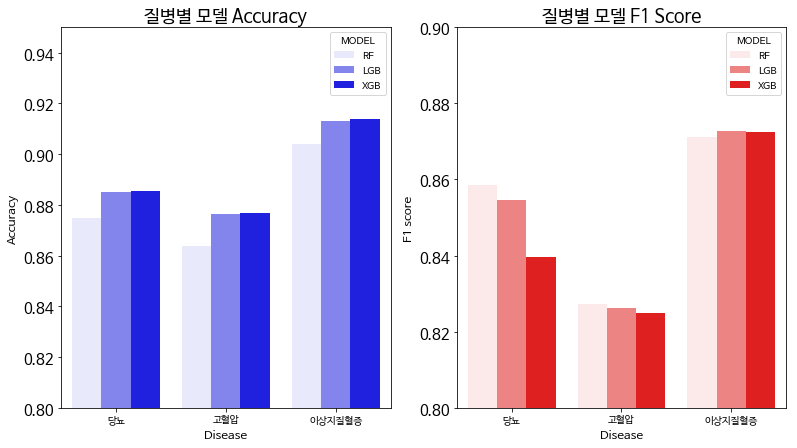

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(13,7))


a = sns.barplot(x=score_df['질병'],y=score_df['Accuracy'], hue=score_df['MODEL'],ax=axs[0],color='blue')
a.set_ylim(0.8, 0.95)
# a.set_yticks(np.arange(0.8, 0.92, step=0.005))
a.set_title('질병별 모델 Accuracy', fontsize=18 )
a.set_ylabel('Accuracy', fontsize=12)
a.set_xlabel('Disease', fontsize=12)
b = sns.barplot(x=score_df['질병'],y=score_df['F1_score'], hue=score_df['MODEL'],ax=axs[1],color='red')
b.set_ylim(0.8, 0.9)
# b.set_yticks(np.arange(0.8, 0.9, step=0.005),)
b.set_title('질병별 모델 F1 Score',fontsize=18 )
b.set_ylabel('F1 score',fontsize=12)
b.set_xlabel('Disease',fontsize=12 )

In [41]:
data_ab_rf.columns

Index(['가입자일련번호', '성별코드', '연령대코드(5세단위)', '허리둘레', '수축기혈압', '이완기혈압', '지질혈증 의사 판정', '합병증_종류', 'BMI', '구강검진 수검여부'], dtype='object')

In [47]:
testing = pd.DataFrame()

 데이터 입력을 했을 때
 공통 : 데이터명 = pd.DataFrame()
1. 고혈압을 선택했을 때
데이터명['성별코드'] = [남자면 1, 여자면 2]  
데이터명['연령대코드(5세단위)'] = 입력 값  
데이터명['허리둘레'] = 입력 값  
데이터명['수축기혈압'] = 입력 값  
데이터명['이완기혈압'] = 입력 값  
데이터명['고혈압 의사 판정'] = 1  
데이터명['BMI'] = 키와 몸무게를 통해 계산된 값  
데이터명['구강검진 수검여부'] = [했으면 1, 안했으면 0]  
2. 당뇨병을 선택했을 때  
데이터명['성별코드'] = [남자면 1, 여자면 2]  
데이터명['연령대코드(5세단위)'] = 입력 값  
데이터명['허리둘레'] = 입력 값  
데이터명['수축기혈압'] = 입력 값  
데이터명['이완기혈압'] = 입력 값  
데이터명['당뇨병 의사 판정'] = 1  
데이터명['BMI'] = 키와 몸무게를 통해 계산된 값  
데이터명['구강검진 수검여부'] = [했으면 1, 안했으면 0]  
3. 이상지질현증을 선택했을 때  
데이터명['성별코드'] = [남자면 1, 여자면 2]  
데이터명['연령대코드(5세단위)'] = 입력 값  
데이터명['허리둘레'] = 입력 값  
데이터명['수축기혈압'] = 입력 값  
데이터명['이완기혈압'] = 입력 값  
데이터명['지질혈증 의사 판정'] = 1  
데이터명['BMI'] = 키와 몸무게를 통해 계산된 값  
데이터명['구강검진 수검여부'] = [했으면 1, 안했으면 0]  
  
이것을 '함수화'하면 좋을 것 같음.

In [68]:
testing['성별코드'] = [1]
testing['연령대코드(5세단위)'] = 5
testing['허리둘레'] = 80
testing['수축기혈압'] = 200
testing['이완기혈압'] = 150
testing['지질혈증 의사 판정'] = 1
testing['BMI'] = 80
testing['구강검진 수검여부'] = 1

In [89]:
def disease_result(data):
    if data == 0 :
        print('합병증의 의심 여부가 없습니다.')
    elif data == 1:
        print('합병증(당뇨병 + 고혈압)이 예상됩니다.')
    elif data == 2:
        print('합병증(이상지질혈증 + 고혈압)이 예상됩니다.')
    elif data == 3:
        print('합병증(당뇨병 + 고혈압)이 예상됩니다.')
    elif data == 4:
        print('합병증(당뇨병 + 고혈압 + 이상지질혈증)이 예상됩니다.')

In [91]:
testing

,성별코드,연령대코드(5세단위),허리둘레,수축기혈압,이완기혈압,지질혈증 의사 판정,BMI,구강검진 수검여부
0,1,5,80,200,150,1,80,1


In [92]:
disease_result(rf_ab_lgbm.predict(testing)[0])

합병증(당뇨병 + 고혈압 + 이상지질혈증)이 예상됩니다.


In [103]:
testing.iloc[:,-4:]

,이완기혈압,지질혈증 의사 판정,BMI,구강검진 수검여부
0,150,1,80,1


### ============= 